### Notebook index

[2 Minimal examples](02-minimal.ipynb)  
[3 Plotting chromosomes](03-plotting.ipynb)   
[4 Multiple OTUs](04-multiple.ipynb)    
[5 Changing units](05-units.ipynb)  
[6 GISH](06-gish.ipynb)  
[7 Groups](07-groups.ipynb)
[8 Circular Plots](08-circular.ipynb)  
[9 Plotting alongside phylogeny](09-phylogeny.ipynb)  
[10 Citrus](10-citrushelp.ipynb)  
[11 Human Karyotype](11-human.ipynb)  

# Plotting alongside phylogeny

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn cell into MARKDOWN
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.4 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



This guide shows the files to plot idiograms alongside a phylogeny 

## ggtree of iqtree and monocentrics

idiogramFISH comes with two trees and data.frames with chr. and marks' data for the correspondent OTUs, first we will plot a tree produced with iqtree [@Nguyen2015c]

### Load the iqtree:

We will use phytools for that [@phytools2012]

In [4]:
neededPkg <- c("ggtree","grid","ggpubr","phytools","treeio","plyr")
invisible(
lapply(neededPkg, function(pkg) {
      if (system.file(package = pkg) == '') {
        install.packages(pkg)
      }
})
)

<div class="fold s">

In [5]:
suppressPackageStartupMessages({
require(ggplot2)
require(phytools)
require(ggpubr)
require(grid)   #pushViewport
require(ggtree)
})
# list.files(system.file('extdata', package = 'my_package') )

# find path of iqtree file
iqtreeFile    <- system.file("extdata", "eightSpIqtree.treefile", package = "idiogramFISH")

# load file as phylo object
iqtreephylo   <- read.newick(iqtreeFile) # phytools

# transform tree
iqtreephyloUM <- force.ultrametric(iqtreephylo, method= "extend") # phytools


</div>

### Make a ggtree [@ggtree2018] {-}

In [6]:
ggtreeOf8 <- ggtree(iqtreephyloUM) + geom_tiplab(size=6)

Modify optionally graphical parameters with ggplot and ggpubr: [@ggplot22016; @R-ggpubr]

<div class="fold s">

In [7]:
gbuil2      <- ggplot_build(ggtreeOf8)       # get ggplot_built
gtgbuild    <- ggplot_gtable(gbuil2)         # get gtable from ggplot_built
gtgbuild$layout$clip[gtgbuild$layout$name == "panel"] <- "off"                # modify gtable
ggtreeOf8b  <- as_ggplot(gtgbuild)           # back to ggplot
gtgbuildgg2 <- ggtreeOf8b +  theme(plot.margin = unit(c(1,9.5,3,1.5), "cm") ) # top right bottom left - modify margins

</div>

### Order OTUs in data.frame of chr. data

Apply order of phylogeny to the data.frame

In [8]:
# Let's get the order of species in tree
ggtreeOf8TIPS <- ggtreeOf8$data[which(ggtreeOf8$data$isTip),]
desiredOrder  <- rev(ggtreeOf8TIPS[order(ggtreeOf8TIPS$y),]$label)

# make a vector without missing OTUs
desiredFiltered <- intersect(desiredOrder,allChrSizeSample$OTU)

# establish desired order
allChrSizeSample$OTU <- factor(allChrSizeSample$OTU, levels = desiredFiltered)

# order
allChrSizeSample     <- allChrSizeSample[order(allChrSizeSample$OTU),]

</div>

Now we have to establish where are the OTUs in the tree, that don't have chr. data

<div class="fold s">

In [9]:
# Establish position of OTUs before missing data OTUs
matchres <- match(desiredOrder,desiredFiltered)
matchres[is.na(matchres)] <- "R"
reps     <- rle(matchres)
posOTUsBeforeMissing      <- as.numeric(matchres[which(matchres=="R")-1][which(matchres[which(matchres=="R")-1]!="R")] )

# This are the OTUs that come before missing chr. data OTUs
BeforeMissing             <- desiredFiltered[posOTUsBeforeMissing]

# This is the amount of missing OTUs, spaces to add (ghost karyotypes)
valuesOfMissRepsBefore    <- reps$lengths[which(reps$values=="R")]

### Plotting

Now we are ready to plot adding those arguments for `addMissingOTUAfter` and `missOTUspacings`


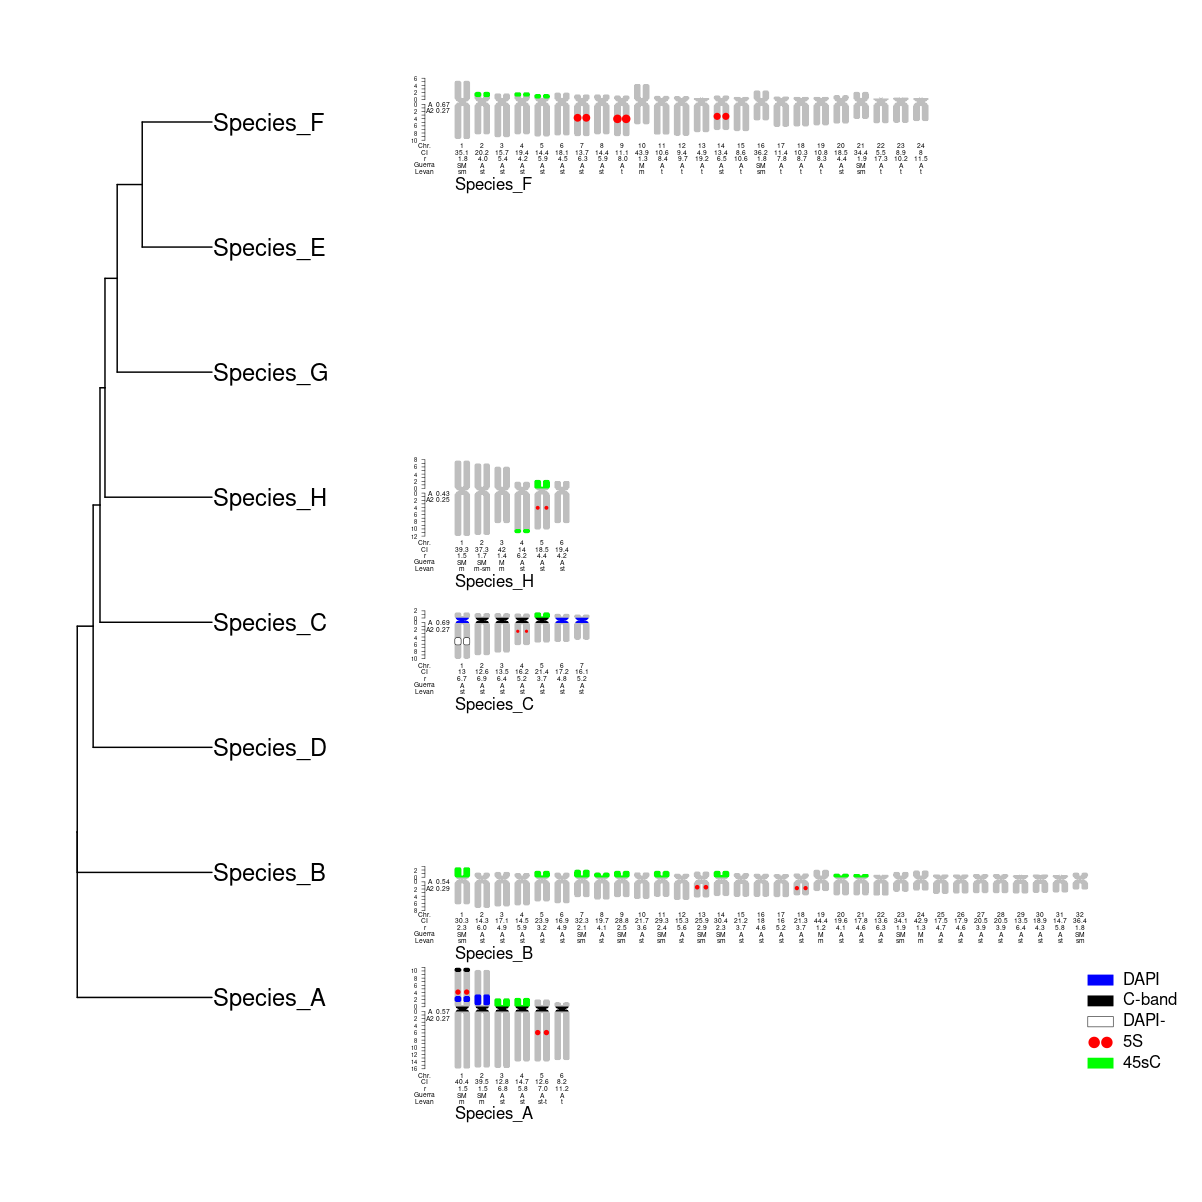

In [10]:
# plot to png file
#png(file="firstplot.png" ,width=962,height=962 )

options(repr.plot.width = 962/80, repr.plot.height = 962/80, repr.plot.res = 100)

par(omi=rep(0,4), 
    mar=c(0,1,2,1), 
    mfrow=c(1,2) )   # one row two columns

par(fig=c(0,.3,0,1)) # location of left ghost plot

plot.new()           # ghost plot to the left
par(fig=c(.3,1,0,1)) # location of right plot

suppressMessages(
plotIdiograms(dfChrSize = allChrSizeSample,    # data.frame of Chr. Sizes
              dfMarkPos = allMarksSample,      # d.f. of Marks (inc. cen. marks) 
              dfMarkColor =  mydfMaColor,      # d.f. of mark characteristics
              
              squareness = 4,                  # squareness of vertices
              lwd.chr=.5,                      # width of lines
              orderChr = "name",               # order chr. by name
              centromereSize = 1.3,            # apparent cen. size
              chrWidth =.75,                   # width of chr.
              chrSpacing = .25,                # horizontal spacing of chr.
              indexIdTextSize=.4,              # font size of indices and chr. names
              
              karHeight = 4.8,                 # karyotype vertical relative size without spacing
              karHeiSpace = 6.5,               # karyotype vertical relative size with spacing
              
              nameChrIndexPos=4,               # move the name of chr. indexes to left
              morpho="both",                   # add chr. morphology
              chrIndex = "both",               # add chr. indices
              karIndex = TRUE,                 # add karyotype indices
              yTitle= "",                      # remove units title of ruler
              
              markLabelSpacer = 0              # spaces from rightmost chr. to legend
              
              ,ylimTopMod = -.1                # modify ylim top margin
              ,ylimBotMod=2.6                  # modify ylim bottom margin
              
              ,rulerPos = -0.5                 # position of rulers
              ,rulerNumberSize = .35           # font size of ruler number
              ,rulerNumberPos = .4             # position of ruler numbers
              ,ruler.tck = -.004               # tick size and orient.
              
              ,addMissingOTUAfter = BeforeMissing          # OTUs after which there are ghost karyotypes - empty spaces
              ,missOTUspacings    = valuesOfMissRepsBefore # number of ghost karyotypes
)
)

# plot to the left the ggtree
pushViewport(viewport(layout = grid.layout(1, 2)))
pushViewport(viewport(layout.pos.col = 1, layout.pos.row = 1))
print(gtgbuildgg2,newpage=F) 

# close png
#dev.off()

</div>

## plot of revBayes tree and holocentrics

Now we are going to plot a tree from revBayes [@Hohna2017]

### First, load the revBayes tree: {-}


In [11]:
suppressPackageStartupMessages({
require(ggplot2)
require(phytools)
require(ggpubr)
require(grid)   #pushViewport
require(ggtree)
require(treeio)
})
# find path of iqtree file
revBayesFile    <- system.file("extdata", "revBayesTutorial.tree", package = "idiogramFISH")

# load file as phylo object
revBayesPhylo   <- read.beast(revBayesFile) # ggtree or treeio

# transform tree
revBayesPhyloUM <- force.ultrametric(revBayesPhylo@phylo, method= "extend") # phytools

</div>

### Order OTUs in data.frame of chr. data

In [12]:
# Get order of OTUs in tree
is_tip           <- revBayesPhyloUM$edge[,2] <= length(revBayesPhyloUM$tip.label)
ordered_tips     <- revBayesPhyloUM$edge[is_tip, 2]
desiredorderRevB <- rev(revBayesPhyloUM$tip.label[ordered_tips])

# Ceate some holocentrics' data

allChrSizeSampleHolo <- allChrSizeSample
allChrSizeSampleHolo <- allChrSizeSampleHolo[,c("OTU","chrName","longArmSize")]
colnames(allChrSizeSampleHolo)[which(names(allChrSizeSampleHolo)=="longArmSize")]<-"chrSize"

allMarksSampleHolo   <- allMarksSample
allMarksSampleHolo   <- allMarksSampleHolo[which(allMarksSampleHolo$chrRegion!="cen"),]
allMarksSampleHolo   <- allMarksSampleHolo[c("OTU","chrName","markName","markDistCen","markSize")]
colnames(allMarksSampleHolo)[which(names(allMarksSampleHolo)=="markDistCen")] <- "markPos"
allMarksSampleHolo[which(allMarksSampleHolo$markName=="5S"),]$markSize <- .5

# Apply order of phylogeny to data.frame

# make a vector without missing OTUs
desiredFiltered <- intersect(desiredorderRevB,allChrSizeSampleHolo$OTU)

# establish desired order
allChrSizeSampleHolo$OTU <- factor(allChrSizeSampleHolo$OTU, levels = desiredFiltered)

# order
allChrSizeSampleHolo <- allChrSizeSampleHolo[order(allChrSizeSampleHolo$OTU),]

</div>

Now we have to establish where are the OTUs in the tree, that don't have chr. data

<div class="fold s">

In [13]:
# Establish position of OTUs before missing data OTUs
matchres <- match(desiredorderRevB,desiredFiltered)
matchres[is.na(matchres)]   <- "R"
reps     <- rle(matchres)
posOTUsBeforeMissing        <- as.numeric(matchres[which(matchres=="R")-1][which(matchres[which(matchres=="R")-1]!="R")] )

# This are the OTUs that come before missing chr. data OTUs
BeforeMissingPlot2          <- desiredFiltered[posOTUsBeforeMissing]

# This is the amount of missing OTUs, spaces to add (ghost karyotypes)
valuesOfMissRepsBeforePlot2 <- reps$lengths[which(reps$values=="R")]

### Plotting

Now we are ready to plot adding those arguments for `addMissingOTUAfter` and `missOTUspacings`


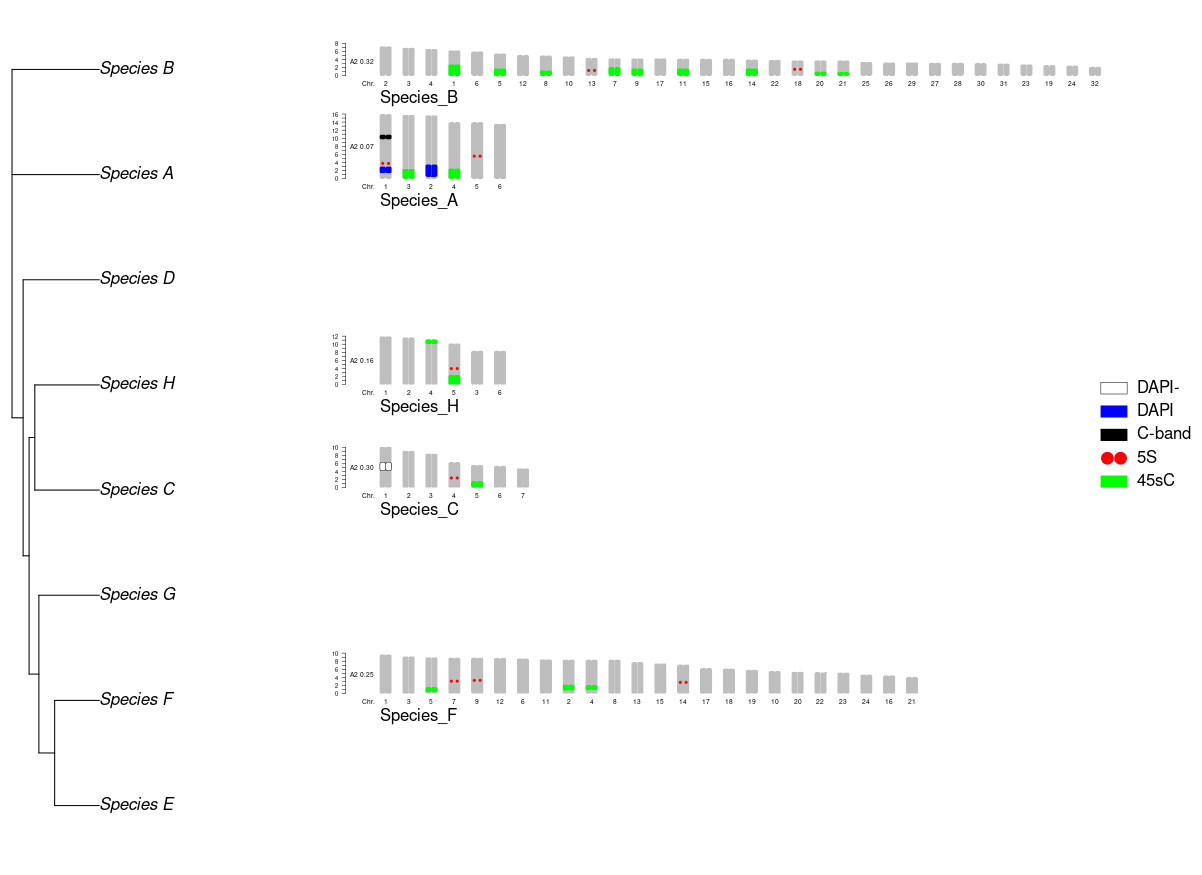

In [14]:
# plot to png file
#png(file=paste0("secondplot.png" ),width=962,height=700)

options(repr.plot.width = 962/80, repr.plot.height = 700/80, repr.plot.res = 100)

{
par(omi=rep(0,4) , mar=c(0,0,0,0), mfrow=c(1,2))
par(fig=c(0,.27,0,1)) 
par(mar=c(2,0,2,0)) # b l t r

plot(revBayesPhyloUM)
par(fig=c(0.27,1,0,1), new=TRUE)
par(mar=c(0,0,0,0)) # b l t r

suppressMessages(
plotIdiograms(allChrSizeSampleHolo,               # chr. size data.frame
              dfMarkPos = allMarksSampleHolo,     # data.frame of marks' positions
              dfMarkColor =  mydfMaColor,         # d.f. of mark characteristics
              
              squareness = 4,                     # vertices squareness
              karHeight = 2.8,                    # karyotype height
              karHeiSpace = 4.5,                  # vertical size of kar. including spacing
              yTitle="",

              karIndex = TRUE,                    # add karyotype index
              indexIdTextSize=.4                  # font size of indices and chr. names
              
              ,addMissingOTUAfter = BeforeMissingPlot2           # add ghost OTUs after these names
              ,missOTUspacings    = valuesOfMissRepsBeforePlot2  # how many ghosts, respectively
              ,lwd.chr=.5                         # line width

              ,markLabelSpacer = 0                # dist. of legend to rightmost chr.
              ,legendWidth = 2.3                  # width of square or dots of legend
              
              ,rulerPos = -0.5                    # position of ruler
              ,rulerNumberSize = .35              # font size of number of ruler
              ,rulerNumberPos = .4                # position of ruler number
              ,ruler.tck=-.004                    # tick of ruler size and orient.

              ,ylimTopMod = -4                    # modify ylim of top
              ,ylimBotMod = -4                    # modify ylim of bottom
              ,xlimRightMod = 3                   # modify xlim right argument
              ,xModifier = 100                    # separ. among chromatids
              )
)
}
# close png
#dev.off()

</div>

## plot of revBayes tree and holocentrics and monocentrics

Create data.frames with both types of karyotypes [@plyr2011]


In [15]:
suppressPackageStartupMessages(
require(plyr)
)
# Select this OTU from the monocen.
monosel<-c("Species_F","Species_C","Species_A")
# chr.
allChrSizeSampleSel  <- allChrSizeSample [which(allChrSizeSample$OTU  %in% monosel  ),]
# marks
allMarksSampleSel    <- allMarksSample   [which(allMarksSample$OTU    %in% monosel  ),]

# Select the others from the holocen.
holosel    <- setdiff(unique(allChrSizeSampleHolo$OTU),monosel)
# chr.
allChrSizeSampleHoloSel <- allChrSizeSampleHolo[which(allChrSizeSampleHolo$OTU %in% holosel  ),]
# marks
allMarksSampleHoloSel   <- allMarksSampleHolo  [which(allMarksSampleHolo$OTU   %in% holosel  ),]

# merge chr d.fs
mixChrSize <- plyr::rbind.fill(allChrSizeSampleSel,allChrSizeSampleHoloSel)

# merge marks' d.fs
mixMarks   <- plyr::rbind.fill(allMarksSampleSel,allMarksSampleHoloSel)

</div>

Order data.frame and determine missing karyotypes

<div class="fold s">

In [16]:
# make a vector without missing OTUs
desiredFiltered <- intersect(desiredorderRevB, mixChrSize$OTU)

# establish desired order
mixChrSize$OTU <- factor(mixChrSize$OTU, levels = desiredFiltered)

# order data.frame
mixChrSize <- mixChrSize[order(mixChrSize$OTU),]

# Establish position of OTUs before missing data OTUs
matchres <- match(desiredorderRevB,desiredFiltered)
matchres[is.na(matchres)]   <- "R"
reps     <- rle(matchres)
posOTUsBeforeMissing        <- as.numeric(matchres[which(matchres=="R")-1][which(matchres[which(matchres=="R")-1]!="R")] )

# This are the OTUs that come before missing chr. data OTUs
BeforeMissingPlot2          <- desiredFiltered[posOTUsBeforeMissing]

# This is the amount of missing OTUs, spaces to add (ghost karyotypes)
valuesOfMissRepsBeforePlot2 <- reps$lengths[which(reps$values=="R")]

### Plotting

Now we are ready to plot adding those arguments for `addMissingOTUAfter` and `missOTUspacings`


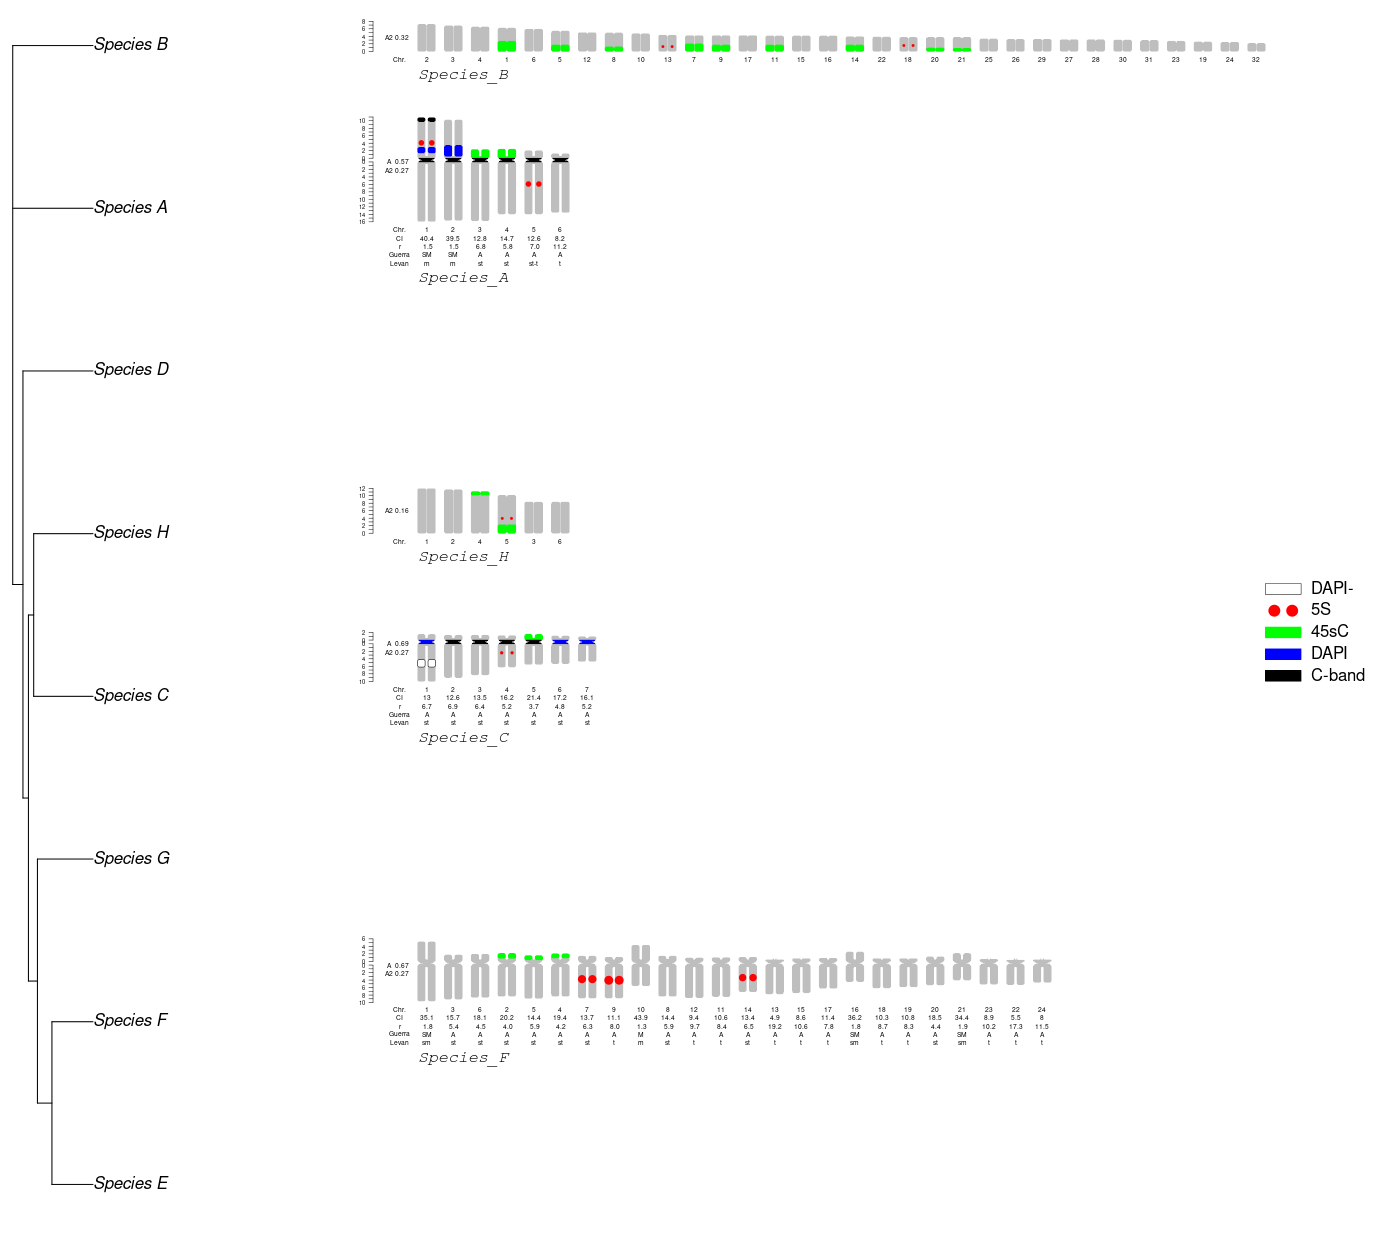

In [17]:
# plot to png file
#png(file=paste0("thirdplot.png" ),width=1100,height=1000)

options(repr.plot.width = 1100/80, repr.plot.height = 1000/80, repr.plot.res = 100)

{
  par(omi=rep(0,4) , mar=c(0,0,0,0), mfrow=c(1,2))
  par(fig=c(0,.25,0,1)) 
  par(mar=c(1,0,0,0))
  
  plot(revBayesPhyloUM)
  par(fig=c(0.25,1,0,1), new=TRUE)
  par(mar=c(0,0,0,0))
  
suppressMessages(
plotIdiograms(mixChrSize,                         # chr. size data.frame
              dfMarkPos = mixMarks,               # data.frame of marks' positions (inc. cen. marks)
              dfMarkColor = mydfMaColor,          # d.f. of mark characteristics
              
              origin="b",                         # position measured from bottom of chr.
              
              karHeight = 2.8,                    # vertical size of kar. including spacing
              karHeiSpace = 4.5,                  # vertical size of kar. including spacing
              squareness = 5,                     # vertices squareness
              chrSpacing = .25,                   # horizontal spacing among chr.
              yTitle = "",
              
              karIndex = TRUE                     # add karyotype index
              ,indexIdTextSize=.4                 # font size of indices and chr. names
              ,distTextChr=0.7                    # dist. among chr. and chr. name
              
              ,addMissingOTUAfter = BeforeMissingPlot2           # add ghost OTUs after these names
              ,missOTUspacings    = valuesOfMissRepsBeforePlot2  # how many ghosts, respectively
              ,lwd.chr=.5                         # line width
              
              ,markLabelSpacer = 0                # dist. of legend to rightmost chr.
              ,legendWidth = 2                    # width of square or dots of legend
              
              ,ylimTopMod = -2                    # modify ylim of top
              ,ylimBotMod = -2                    # modify ylim of bottom
              
              ,rulerPos = -0.5                    # position of ruler
              ,rulerNumberSize = .35              # font size of number of ruler
              ,rulerNumberPos = .4                # position of ruler number
              ,ruler.tck=-.004                    # ruler tick size and orient.
              ,OTUfont=3                          # italics
              ,OTUfamily="Courier New"            # for OTU name
              
              ,xModMonoHoloRate = 5               # factor (quotient) to shrink separation of chromatids of holocen.
              
)
)
}
# close png
#dev.off()

</div>